In [1]:
# 🌀 Duffing Oscillator Exploration
# =================================
# This notebook explores the dynamics of the Duffing oscillator —
# a classic nonlinear system that exhibits both periodic and chaotic behaviour
# depending on parameter values.

# Author: Riddhika Mahalanabis
# Date: 31.10.2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-darkgrid')

In [14]:
def duffing(t, y, delta=0.2, alpha=-1.0, beta=1.0, gamma=0.3, omega=1.2):
    """
    Duffing oscillator:
    x'' + delta*x' + alpha*x + beta*x^3 = gamma*cos(omega*t)
    """
    x, v = y
    dxdt = v
    dvdt = -delta*v - alpha*x - beta*x**3 + gamma*np.cos(omega*t)
    return [dxdt, dvdt]

def solve_duffing(t_span=(0, 5000), y0=(0, 0), dt=0.1, **params):
    """Numerically solve the Duffing oscillator."""
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(lambda t, y: duffing(t, y, **params), t_span, y0, t_eval=t_eval)
    return sol.t, sol.y


In [15]:
params = dict(delta=0.2, alpha=-1.0, beta=1.0, gamma=0.3, omega=1.2)
t, y = solve_duffing(y0=(0.1, 0.0), **params)

x, v = y
print(f"Integration complete: {len(t)} time points")

Integration complete: 50000 time points


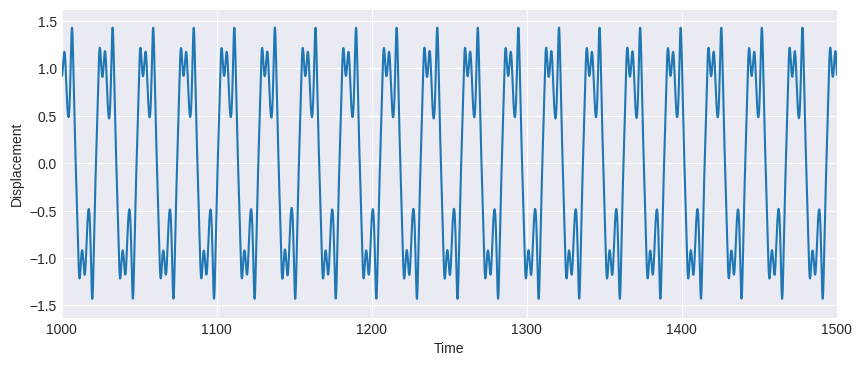

In [19]:
## Time-series plot

plt.figure(figsize=(10,4))
plt.plot(t, x, label="x(t)")
plt.xlim(1000, 1500)
plt.xlabel("Time")
plt.ylabel("Displacement")
#plt.legend()
plt.show()

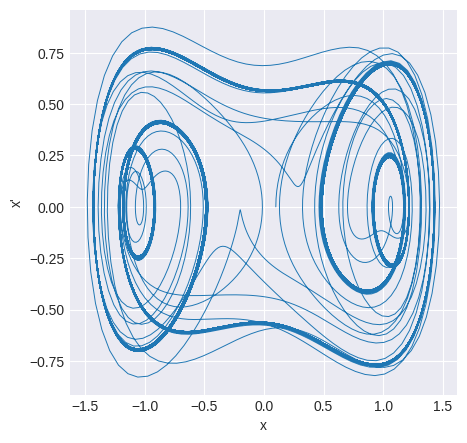

In [17]:
## Phase portrait

plt.figure(figsize=(5,5))
plt.plot(x, v, lw=0.7)
plt.xlabel("x")
plt.ylabel("x'")
plt.show()
